In [1]:
import numpy as np
import pandas as pd
#import pyjags
import pystan
import stan_utility_copy
import pickle
import matplotlib.pyplot as plt
from pystan import StanModel
from __future__ import division, print_function
from pandas.tools.plotting import *
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
#plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#%qtconsole





In [2]:
!which python
!python --version

/Users/meganshabram/anaconda3/bin/python
Python 3.6.4 :: Anaconda, Inc.


In [3]:
## function to draw from truncated normal, this function will be used for both the 
## one- and two-componenet cases in this workbook.  

def rnorm_bound( Ndata, mu, prec, lower_bound = 0.0, upper_bound = float('Inf')):
    x = np.zeros(Ndata)
    #print(x)
    for i in range(0, Ndata): 
            #print(i)
            while True:
                x[i] = np.random.normal(mu,prec,1)
                if( (x[i]>lower_bound) and (x[i]<upper_bound) ): 
                    break
    return x;

In [4]:
## Below we designate the population values of our two-component truncated Gaussian 
## generative model. These are the truths that we should recover if our hiararchical 
## Bayesian model is properly specified and diagnostics have indicated that the simulation 
## has "not not converged".
Ndata = 99
Nm = 2
frac = [0.7,0.3]
sigmae = [0.05,0.3]

## After generating values from the population model, we now add realistic Gaussian noise 
## to create simulated measurements. 
sigmahobs = 0.04
sigmakobs = 0.08
#sigmahobs = 0.001
#sigmakobs = 0.001

h = np.repeat(0.,Ndata)
k = np.repeat(0.,Ndata)
hhat = np.repeat(0.,Ndata)
khat = np.repeat(0.,Ndata)
hhat_sigma  = np.repeat(sigmahobs,Ndata)
khat_sigma  = np.repeat(sigmakobs,Ndata)

#print(khat_sigma)

for i in range(0,Ndata):
    #print('i')
    #print(i)
    
    c = np.random.choice(len(frac), 1, p=frac, replace=True)
    #print(int(c))
    h[i] = rnorm_bound(1,0,sigmae[int(c)],lower_bound=-1,upper_bound=1)
    # Euler's formula: h^2 + k^2 = 1
    lb = -np.sqrt(1-h[i]**2)
    ub = np.sqrt(1-h[i]**2)
    k[i] = rnorm_bound(1,0,sigmae[int(c)],lower_bound=lb,upper_bound=ub) 
    hhat[i] = rnorm_bound(1,h[i],sigmahobs,lower_bound=-1,upper_bound=1)
    khat[i] = rnorm_bound(1,k[i],sigmakobs,lower_bound=lb,upper_bound=ub)

    
#print(h, hhat, k, khat)
print(k.shape)

(99,)


(array([ 1.,  1.,  0., 14., 45., 22.,  5.,  8.,  1.,  2.]),
 array([-0.48252588, -0.37965788, -0.27678989, -0.17392189, -0.07105389,
         0.03181411,  0.13468211,  0.23755011,  0.34041811,  0.44328611,
         0.54615411]),
 <a list of 10 Patch objects>)

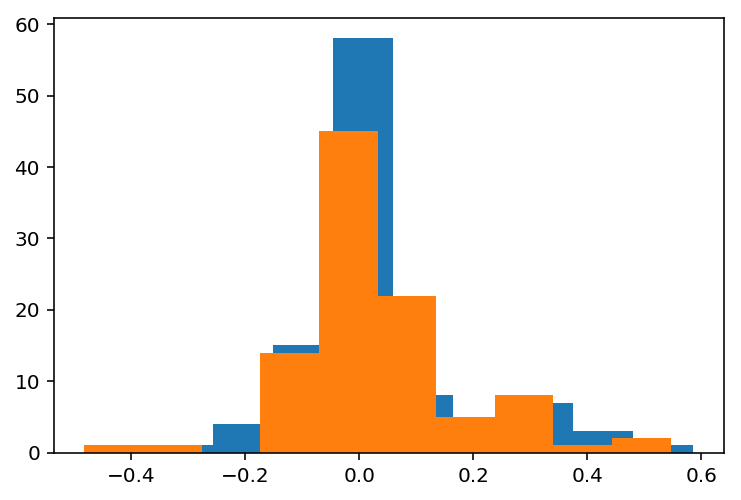

In [5]:
plt.hist(h)
plt.hist(hhat)

(array([ 1.,  0.,  1.,  4., 22., 30., 26.,  7.,  5.,  3.]),
 array([-0.71522197, -0.58781357, -0.46040517, -0.33299676, -0.20558836,
        -0.07817995,  0.04922845,  0.17663686,  0.30404526,  0.43145367,
         0.55886207]),
 <a list of 10 Patch objects>)

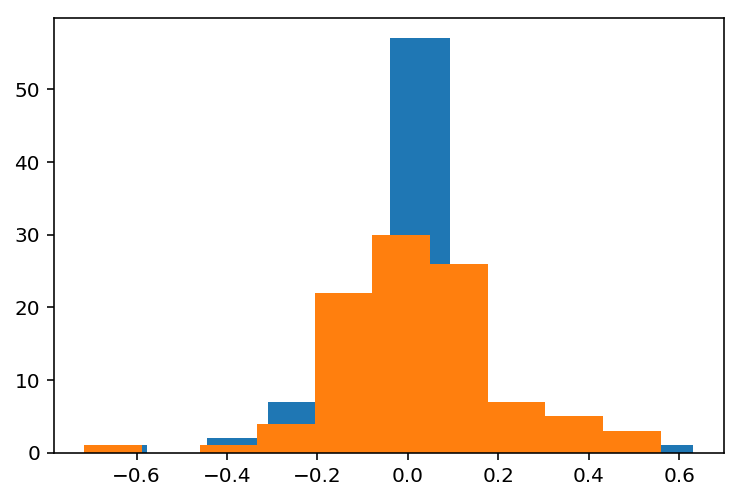

In [6]:
plt.hist(k)
plt.hist(khat)

In [7]:
'''
## One-component Gaussian Mixture Simulated Data
## Below we designate the population values of our generative model. These are the 
## truths that we should recover if our hiararchical Bayesian model is properly specified 
## and diagnostics have indicated that the simulation has "not not converged". "You can't 
## prove convergence, at best you can fail to prove a failure to converge".

## In this simulated data set, their are 50 planetary systems (with one planet each)
Ndata = 25 
## Here we asign the dispersion of the simulated population to be 0.3, this is 
## the truth we wish to recovern 
sigmae = 0.3 
## We approximate the uncertainty for each measurement as normally distributed about a 
## reporte measurement point estimate.  For the eccentricity distribution for Hot Jupiter
## the physical models used to derive these produce larger uncertainty in k by a factor of 2. 
sigmahobs = 0.04
sigmakobs = 0.08

h = np.repeat(0.,Ndata)
k = np.repeat(0.,Ndata)
hhat = np.repeat(0.,Ndata)
khat = np.repeat(0.,Ndata)
hhat_sigma  = np.repeat(sigmahobs,Ndata)
khat_sigma  = np.repeat(sigmakobs,Ndata)

#print(khat_sigma)


for i in range(0,Ndata):
    h[i] = rnorm_bound(1,0,sigmae,lower_bound=-1,upper_bound=1)
    lb = -np.sqrt(1-h[i]**2)
    ub = np.sqrt(1-h[i]**2)
    k[i] = rnorm_bound(1,0,sigmae,lower_bound=lb,upper_bound=ub) 
    hhat[i] = rnorm_bound(1,h[i],sigmahobs,lower_bound=-1,upper_bound=1)
    khat[i] = rnorm_bound(1,k[i],sigmakobs,lower_bound=lb,upper_bound=ub)

## Vizualize the true data values, and the simulated measurements:     
print(h, hhat, k, khat)
plt.hist(h)
plt.hist(hhat)
'''

'\n## One-component Gaussian Mixture Simulated Data\n## Below we designate the population values of our generative model. These are the \n## truths that we should recover if our hiararchical Bayesian model is properly specified \n## and diagnostics have indicated that the simulation has "not not converged". "You can\'t \n## prove convergence, at best you can fail to prove a failure to converge".\n\n## In this simulated data set, their are 50 planetary systems (with one planet each)\nNdata = 25 \n## Here we asign the dispersion of the simulated population to be 0.3, this is \n## the truth we wish to recovern \nsigmae = 0.3 \n## We approximate the uncertainty for each measurement as normally distributed about a \n## reporte measurement point estimate.  For the eccentricity distribution for Hot Jupiter\n## the physical models used to derive these produce larger uncertainty in k by a factor of 2. \nsigmahobs = 0.04\nsigmakobs = 0.08\n\nh = np.repeat(0.,Ndata)\nk = np.repeat(0.,Ndata)\nhhat

In [9]:
%%time
!date

eccmodel = """
data {
    int<lower=1> Nm;
    int<lower=1> Ndata;
    real<lower=-1,upper=1> hhat[Ndata];
    real<lower=0,upper=1> hhat_sigma[Ndata];
    real<lower=-1,upper=1> khat[Ndata];
    real<lower=0,upper=1> khat_sigma[Ndata];

}
parameters {

    //simplex[Nm] f; // mixing proportions
    //ordered mu[Nm]; // locations of mixture components
    //vector<lower=0,upper=1.0>[Nm] e_sigma; // scales of mixture components

    real<lower=0,upper=1> f;
    //simplex[Nm] f;

    //ordered e_sigma[Nm];
    //positive_ordered[Nm] e_sigma;
    //real<lower=0> e_sigma[Nm];
    vector<lower=0,upper=1.0>[Nm] e_sigma; // scales of mixture components

    real<lower=-1,upper=1> h[Ndata];
    real<lower=-1,upper=1> k[Ndata];
}

transformed parameters {
   // ordered mu[Nm]; // locations of mixture components
    
   // mu[1] = 0.0
   // mu[2] = 0.0
}

model {
    //e_sigma ~ uniform(0, 1.0);
    
    hhat ~ normal(h, hhat_sigma);
    khat ~ normal(k, khat_sigma);

    for (n in 1:Ndata)
      target += log_mix(f, normal_lpdf(h[n] | 0.0, e_sigma[1]), normal_lpdf(h[n] | 0.0, e_sigma[2]));
      //target += log_mix(f[1], normal_lpdf(h[n] | 0.0, e_sigma[1]), normal_lpdf(h[n] | 0.0, e_sigma[2]));
    for (n in 1:Ndata)
      target += log_mix(f, normal_lpdf(k[n] | 0.0, e_sigma[1]), normal_lpdf(k[n] | 0.0, e_sigma[2]));
      //target += log_mix(f[1], normal_lpdf(k[n] | 0.0, e_sigma[1]), normal_lpdf(k[n] | 0.0, e_sigma[2]));
}
"""
# Compiled Stan Model
sm = StanModel(model_code=eccmodel)

!date

Sun Apr 29 14:04:41 PDT 2018


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5da32a19a923d19add8132deac5b2831 NOW.


Sun Apr 29 14:05:38 PDT 2018
CPU times: user 1.71 s, sys: 161 ms, total: 1.87 s
Wall time: 57.1 s


In [14]:
%%time
!date
ecc_dat = {'Nm': 2, 'Ndata': len(hhat), 'alpha': [1], 'hhat': hhat, 'hhat_sigma': hhat_sigma, 'khat': khat, 'khat_sigma': khat_sigma}


fit = sm.sampling(data=ecc_dat, iter=5000, chains=4, refresh=10, n_jobs=-1)

!date

Sun Apr 29 14:10:04 PDT 2018


/Users/meganshabram/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Sun Apr 29 14:10:42 PDT 2018
CPU times: user 124 ms, sys: 193 ms, total: 317 ms
Wall time: 38.1 s


In [15]:
## I found Python stan_utility on Jeff Alstott's github: https://github.com/jeffalstott/pystan_time_series
## I am refereing to the Stan Case Studies for HMC diagnostics in pystan:
## http://mc-stan.org/users/documentation/case-studies/pystan_workflow.html

#help(stan_utility_copy)

In [16]:
%%time
!date

print(fit)

!date

Sun Apr 29 14:10:45 PDT 2018
Inference for Stan model: anon_model_5da32a19a923d19add8132deac5b2831.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
f            0.59  2.1e-3   0.09   0.41   0.54    0.6   0.66   0.75   1773    1.0
e_sigma[0]   0.05  4.7e-4   0.01   0.02   0.04   0.05   0.06   0.07    942    1.0
e_sigma[1]   0.25  5.8e-4   0.03    0.2   0.23   0.25   0.27   0.33   3140    1.0
h[0]         0.02  3.2e-4   0.03  -0.04-4.6e-3   0.02   0.04   0.08  10000    1.0
h[1]         0.02  3.3e-4   0.03  -0.04-3.9e-3   0.02   0.04   0.09  10000    1.0
h[2]      -2.4e-4  3.1e-4   0.03  -0.06  -0.02-3.8e-4   0.02   0.06  10000    1.0
h[3]        -0.11  4.3e-4   0.04  -0.19  -0.13   -0.1  -0.07  -0.02  10000    1.0
h[4]         0.13  4.4e-4   0.04   0.05    0.1   0.13   0.16   0.22  10000    1.0
h[5]         0.02  3.3e-4   0.03  -0.04-3.5

CPU times: user 1.79 s, sys: 53.8 ms, total: 1.84 s
Wall time: 2.1 s


In [17]:
stan_utility_copy.check_treedepth(fit)
stan_utility_copy.check_energy(fit)
stan_utility_copy.check_div(fit)


"0 of 10000 iterations saturated the maximum tree depth of 10 (0.0%)"
"Chain 0: E-BFMI = 0.5732789222502485"
"Chain 1: E-BFMI = 0.7050780182531048"
"Chain 2: E-BFMI = 0.6529042057121288"
"Chain 3: E-BFMI = 0.5325849320525691"
0.0 of 10000 iterations ended with a divergence (0.0%)


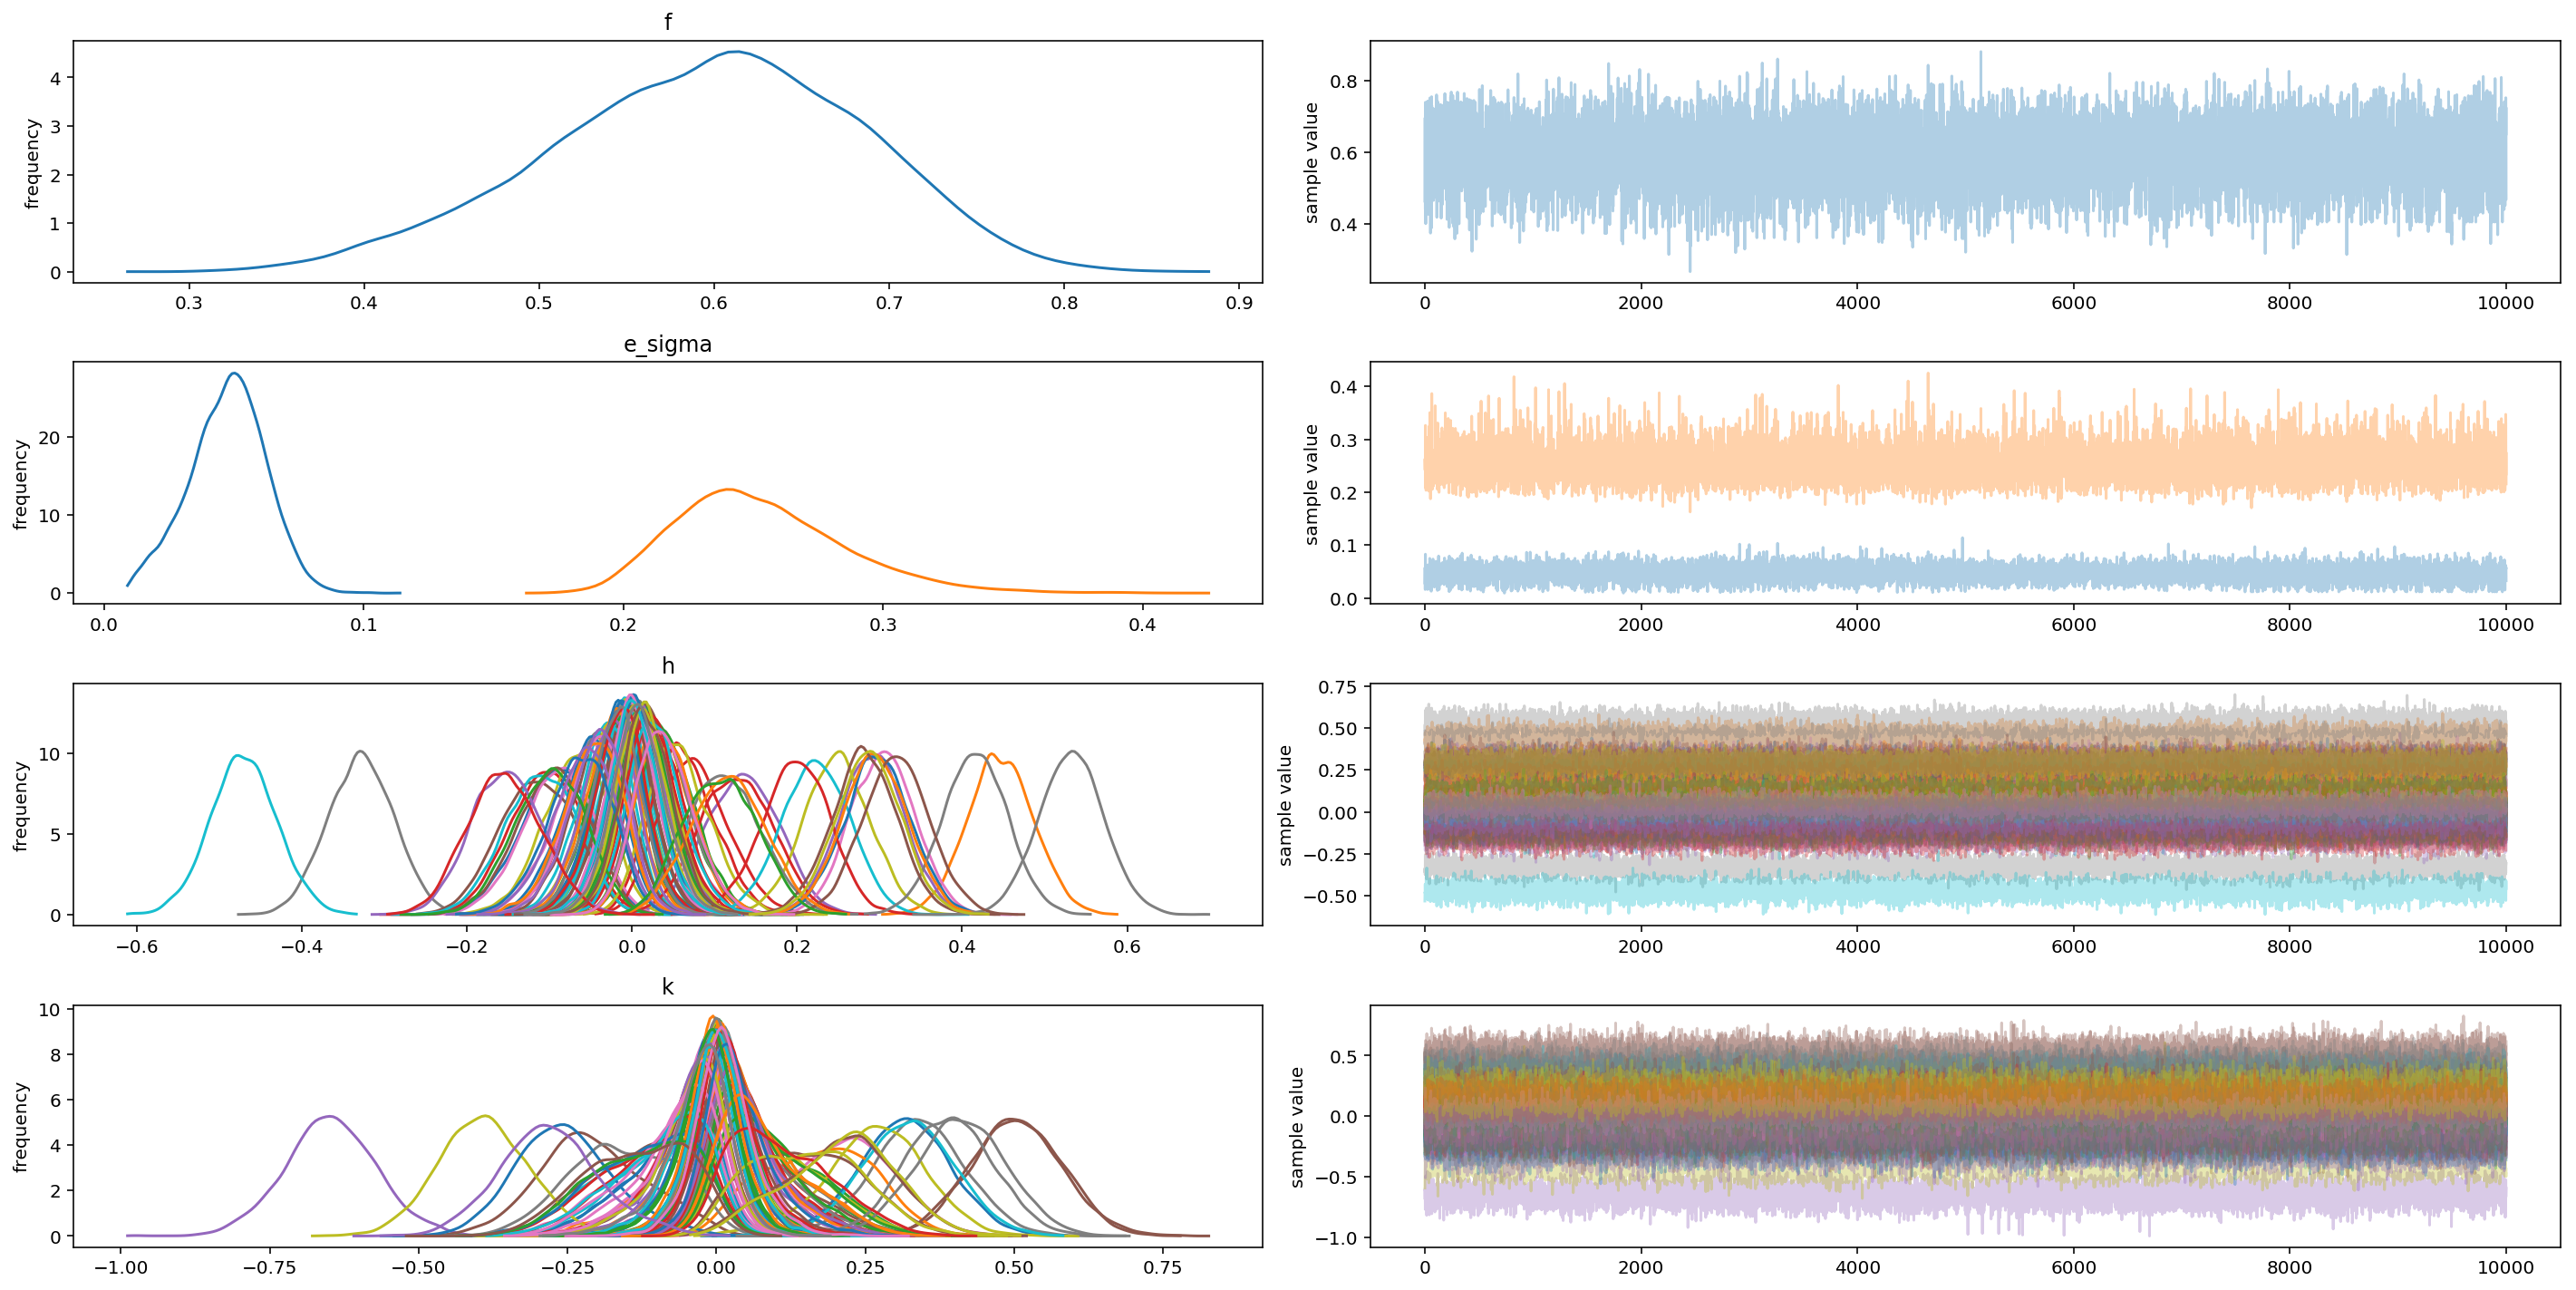

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
fig = fit.traceplot()
fig.tight_layout()


In [ ]:
light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"

nondiv_params, div_params = stan_utility_copy.partition_div(fit)
print(nondiv_params['e_sigma'][:,0].shape)
print(div_params['e_sigma'][:,0].shape)
print(nondiv_params['f'][:,0].shape)
print(div_params['f'][:,0].shape)
#plt.scatter([x[0] for x in nondiv_params['f'][:,0]], nondiv_params['e_sigma'][:,0], \
             #color = mid_highlight, alpha=0.05)
#plt.scatter([x[0] for x in div_params['f'][:,0]], div_params['e_sigma'][:,0], \
             #color = green, alpha=0.5)

plt.scatter(nondiv_params['f'][:,1], nondiv_params['e_sigma'][:,1])
plt.scatter(div_params['f'][:,1], div_params['e_sigma'][:,1])

plt.gca().set_xlabel("f")
plt.gca().set_ylabel("e_sigma")



In [ ]:
help(pystan)

In [ ]:
%%time
!date

#fit2 = sm.sampling(data=ecc_dat, iter=10000, chains=5, seed=483892929, refresh=1000, n_jobs=-1, control=dict(adapt_delta=0.99))
fit2 = sm.sampling(data=ecc_dat, iter=10000, chains=4, seed=483892929, refresh=100, n_jobs=-1)

!date

In [ ]:
print(fit2)
stan_utility_copy.check_treedepth(fit2)
stan_utility_copy.check_energy(fit2)
stan_utility_copy.check_div(fit2)
plt.rcParams["figure.figsize"] = (20,10)
fig2 = fit2.traceplot()
fig2.tight_layout()


In [ ]:
light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"

nondiv_params, div_params = stan_utility_copy.partition_div(fit2)
print(nondiv_params['e_sigma'][:,0].shape)
print(div_params['e_sigma'][:,0].shape)
print(nondiv_params['f'][:,0].shape)
print(div_params['f'][:,0].shape)
#plt.scatter([x[0] for x in nondiv_params['f'][:,0]], nondiv_params['e_sigma'][:,0], \
             #color = mid_highlight, alpha=0.05)
#plt.scatter([x[0] for x in div_params['f'][:,0]], div_params['e_sigma'][:,0], \
             #color = green, alpha=0.5)

plt.scatter(nondiv_params['f'][:,0], nondiv_params['e_sigma'][:,0])
plt.scatter(div_params['f'][:,0], div_params['e_sigma'][:,0])

plt.gca().set_xlabel("f")
plt.gca().set_ylabel("e_sigma")


In [ ]:
num_chains = 5
samples_Stan = fit2.extract(permuted=True)
print(type(samples_Stan['e_sigma'][:,0]))
print(samples_Stan.items())

for j, i in samples_Stan.items():
    print(j)
    print(i.shape)
    



In [ ]:

e_sigma_1 = samples_Stan['e_sigma'][:,0]
f_1 = samples_Stan['f'][:,0]
e_sigma_2 = samples_Stan['e_sigma'][:,1]
f_2 = samples_Stan['f'][:,1]

print( np.hstack(( f_1.reshape(-1,1), e_sigma_1.reshape(-1,1), f_2.reshape(-1,1), e_sigma_2.reshape(-1,1) )) ) 

# Sort the sigma high and sigma low values:
e_sigma_low = np.minimum(e_sigma_1,e_sigma_2)
e_sigma_hi = np.maximum(e_sigma_1,e_sigma_1)
 
e_sigma_low = np.where(e_sigma_1 <= e_sigma_2, e_sigma_1, e_sigma_2)
e_sigma_hi = np.where(e_sigma_1 > e_sigma_2, e_sigma_1, e_sigma_2)
f_low = np.where(e_sigma_1 <= e_sigma_2, f_1, f_2)
f_high = np.where(e_sigma_1 > e_sigma_2, f_1, f_2)

print( np.hstack(( f_low.reshape(-1,1), e_sigma_low.reshape(-1,1), f_high.reshape(-1,1), e_sigma_hi.reshape(-1,1) )) ) 


In [ ]:
## Print and check the shape of the resultant samples dictionary:
#print(samples)
#print(samples.items())
print('-----')
print(samples_Stan['e_sigma'].shape)
print(samples_Stan['h'].shape)
print(samples_Stan['h'][:,3].shape)
print('-----')


## Update the samples dictionary so that it includes keys for the latent variables
## Also, we will use LaTeX formatting to help make legible plots ahead.  
samples_Nm2_Stan = {}

## adjust the thin varible to only look at every #th population element 
thin1 = 1

## Need to enter the number of hyperparameter variables here:
numHyperParams = 4

## Specify the dimension we want for our plot below, for legibility.  
dim1 = (Ndata/thin1) + numHyperParams
print(dim1)

for i in np.arange(0,Ndata,thin1):
    samples_Nm2_Stan.update({'$h_{'+str(i+1)+'}$': samples_Stan['h'][:,i],'$k_{'+str(i+1)+'}$': samples_Stan['k'][:,i]})
## Add the hyperparameter marginal posterior back in:
samples_Nm2_Stan.update({'$e_{\sigma_{low}}$': e_sigma_low})
samples_Nm2_Stan.update({'$e_{\sigma_{high}}$': e_sigma_hi})
samples_Nm2_Stan.update({'$f_{low}$': f_low})
samples_Nm2_Stan.update({'$f_{high}$': f_high})
#print(samples_Nm2_Stan['$h_{5}$'].shape)

## Reshape values for diagnostic plot functions (trace, autocorrelation) below:  
samples_Nm2_trace_Stan = {}    
for j, i in samples_Nm2_Stan.items():
    samples_Nm2_trace_Stan.update({str(j): i.reshape(int(len(i)/num_chains),-1)})


In [ ]:
%%time
!date
## Use pandas three dimensional Panel to represent the trace:

trace_1_Stan = pd.Panel({k: v for k, v in samples_Nm2_trace_Stan.items()})
trace_1_Stan.axes[0].name = 'Variable'
trace_1_Stan.axes[1].name = 'Iteration'
trace_1_Stan.axes[2].name = 'Chain'
 
## Point estimates:
print(trace_1_Stan.to_frame().mean())
 
## Bayesian equal-tailed 95% credible intervals:
print(trace_1_Stan.to_frame().quantile([0.05, 0.95]))
  ## ^ entering the values here could be a good question part
    
def plot(trace, var):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(var, y=0.95, fontsize='xx-large')
 
    ## Marginal posterior density estimate:
    trace[var].plot.density(ax=axes[0])
    axes[0].set_xlabel('Parameter value')
    axes[0].locator_params(tight=True)
 
    ## Autocorrelation for each chain:
    axes[1].set_xlim(0, 100)
    for chain in trace[var].columns:
        autocorrelation_plot(trace[var,:,chain], axes[1], label=chain)
 
    ## Trace plot:
    axes[2].set_ylabel('Parameter value')
    trace[var].plot(ax=axes[2])
 
    ## Save figure
    filename = var.replace("\\", "") 
    filename = filename.replace("$", "") 
    filename = filename.replace("}", "") 
    filename = filename.replace("{", "") 
    plt.tight_layout(pad=3)
    fig.savefig('{}.png'.format(filename))
!date
# Display diagnostic plots
for var in trace_1_Stan:
    plot(trace_1_Stan, var);
 



In [ ]:
## adjust the thin varible to only look at every #th population element 
##Ndata is 25 use 
thin = 5
##Ndata is 20 use
#thin = 4
numHyperParams = 4

## Re-specify the dimension we want for our plot below, with thinning, for legibility.  
dim2 = int((Ndata/thin) + numHyperParams)
print(dim2)
print(k)
samples_Nm2_triangle_1_Stan = {}
truths_hhat = {}
truths_h = {}
for i in np.arange(0,Ndata,thin):
    print(i)
    print(samples_Stan['h'][:,i])
    print(samples_Stan['k'][:,i])
    print(h[i])
    print(k[i])
    print(hhat[i])
    print(khat[i])
    samples_Nm2_triangle_1_Stan.update({'$h_{'+str(i+1)+'}$': samples_Stan['h'][:,i],'$k_{'+str(i+1)+'}$': samples_Stan['k'][:,i]})
    truths_hhat.update({'$h_{'+str(i+1)+'}$': hhat[i],'$k_{'+str(i+1)+'}$': khat[i]})
    truths_h.update({'$h_{'+str(i+1)+'}$': h[i],'$k_{'+str(i+1)+'}$': k[i]})
samples_Nm2_triangle_1_Stan.update({'$e_{\sigma_{low}}$': e_sigma_low,'$e_{\sigma_{high}}$': e_sigma_hi,'$f_{low}$': f_low,'$f_{high}$': f_high})
truths_hhat.update({'$e_{\sigma_{low}}$': e_sigma_low,'$e_{\sigma_{high}}$': e_sigma_hi,'$f_{low}$': f_low,'$f_{high}$': f_high})
truths_h.update({'$e_{\sigma_{low}}$': e_sigma_low,'$e_{\sigma_{high}}$': e_sigma_hi,'$f_{low}$': f_low,'$f_{high}$': f_high})



In [ ]:
print(samples_Nm2_triangle_1_Stan.keys())
print(int(dim2))
print(truths_hhat.values())

In [ ]:
%%time
!date

import triangle_linear
#data = np.asarray(samples_Nm1_scatter_matrix_triangle.values()).reshape((5000*num_chains),int(dim2))
#print(np.asarray(samples_Nm1_scatter_matrix_triangle.values()).reshape((5000*num_chains),int(dim2)).shape)

samples_Nm2_triangle_2_Stan = {}    
for j, i in samples_Nm2_triangle_1_Stan.items():
    samples_Nm2_triangle_2_Stan.update({str(j): i.reshape(-1,1)})
    
data = None
for k, v in samples_Nm2_triangle_2_Stan.items():
    column = v.reshape(-1,1)
    if data is None:
        data = column
    else:
        data = np.hstack((data, column))

print(data[:].shape)
print(len(truths_hhat.keys()))
print(len(samples_Nm2_triangle_2_Stan.keys()
!date

In [ ]:
%%time
!date

figure = triangle_linear.corner(data,labels=samples_Nm2_triangle_2_Stan.keys(),labelsy=samples_Nm2_triangle_2_Stan.keys(), truths=truths_hhat.values(), truths_color = 'black')

plt.savefig('triangle_linear_Nm2_Stan.png')

!date

<h2 align="center">Part 2: Explore Matt Trick or non-centered parameterization </h2>

This is probably not necessary for this model.  The generative model is Normal centered at zero.  

In [ ]:
eccmodel = """
data {
    int<lower=1> Nm;
    int<lower=1> Ndata;
    real<lower=-1,upper=1> hhat[Ndata];
    real<lower=0,upper=1> hhat_sigma[Ndata];
}

parameters {
    simplex[2] f;
    real<lower=0> e_sigma[2];
    real<lower=-1,upper=1> h[Ndata];
    real h_tilde[Ndata];

}


model {
    e_sigma ~ uniform(0, 1.0);
    h_tilde ~ normal(0, 1);

    for (n in 1:Ndata)
      hhat[n] ~ normal(h[n], hhat_sigma[n]);

    for (n in 1:Ndata)
      increment_log_prob(log_mix(f[1], normal_log(h[n], 0.0, e_sigma[1] * h_tilde[n]), normal_log(h[n], 0.0, e_sigma[2] * h_tilde[n])));
}
"""
# Compiled Stan Model
sm = StanModel(model_code=eccmodel)